## Logistic Regression

Logistic regression is a commonly used technique **for solving binary classification problems**.

* In this case, we are predicting if the package is going to arrive on time. (Classes are "1" for yes and "0" for no.)

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured:


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

### Steps

1. Loading data from parquet and joblib.
2. Training a logistic regression model using Scikit-learn.
3. Evaluating a model using a validation set and test set.
4. Getting and saving predictions.
5. Conclusions about the model applied.

## Loading data from parquet and joblib

First of all, We get a simple extension for Jupyter Notebook and Jupyter Lab to beautify Python code automatically using Black.

In [30]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

Lets import the basic modules we are going to use.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

The following settings will improve the default style and font sizes for our charts.

In [32]:
import matplotlib

sns.set_style("darkgrid")  # Dark grid background
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"
pd.set_option("display.max_columns", None)  # To show all columns

<IPython.core.display.Javascript object>

Let's read the data back using pd.read_parquet.

In [33]:
train_inputs = pd.read_parquet("../Datawarehouse/train_inputs.parquet")
val_inputs = pd.read_parquet("../Datawarehouse/val_inputs.parquet")
test_inputs = pd.read_parquet("../Datawarehouse/test_inputs.parquet")

train_targets = pd.read_parquet("../Datawarehouse/train_targets.parquet")[
    "Reached.on.Time_Y.N"
]
val_targets = pd.read_parquet("../Datawarehouse/val_targets.parquet")[
    "Reached.on.Time_Y.N"
]
# test_targets = pd.read_parquet('../Datawarehouse/val_targets.parquet')["Reached.on.Time_Y.N"]

<IPython.core.display.Javascript object>

Let's verify that the data was loaded properly.

In [34]:
print("train_inputs:", train_inputs.shape)
print("train_targets:", train_targets.shape)
print("val_inputs:", val_inputs.shape)
print("val_targets:", val_targets.shape)
print("test_inputs:", test_inputs.shape)
# print("test_targets:", test_targets)

train_inputs: (6749, 23)
train_targets: (6749,)
val_inputs: (2250, 23)
val_targets: (2250,)
test_inputs: (2000, 23)


<IPython.core.display.Javascript object>

There are some objects from EDA.ipynb that must be loaded back using joblib.load

In [35]:
import joblib

<IPython.core.display.Javascript object>

In [36]:
eda = joblib.load("../eda_basics_features.joblib")

<IPython.core.display.Javascript object>

Let's load each dataframe ready for the models

In [37]:
X_train = train_inputs[eda["numeric_cols"] + eda["encoded_cols"]]
X_val = val_inputs[eda["numeric_cols"] + eda["encoded_cols"]]
X_test = test_inputs[eda["numeric_cols"] + eda["encoded_cols"]]

<IPython.core.display.Javascript object>

## Training a logistic regression model using Scikit-learn

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [38]:
from sklearn.linear_model import LogisticRegression

<IPython.core.display.Javascript object>

First, we intanciate the class and then we train the model.

In [39]:
model = LogisticRegression(solver="liblinear")

<IPython.core.display.Javascript object>

In [40]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

<IPython.core.display.Javascript object>

Let's check the weights and biases of the trained model.

In [41]:
print(eda["numeric_cols"] + eda["encoded_cols"])

['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Product_importance_high', 'Product_importance_low', 'Product_importance_medium', 'Gender_F', 'Gender_M']


<IPython.core.display.Javascript object>

In [42]:
print(model.coef_.tolist())

[[-0.6726748472608806, 0.15858878109025487, -0.4561396653184551, -0.45891359657755215, 6.679343972667584, -2.1847937819000647, 0.026998439886948142, 0.16917599128446853, 0.047057875064945194, 0.13662779510736647, 0.10525171373681658, 0.19531995842453834, 0.08838363758179694, 0.20140821907415854, 0.3672103310690841, 0.03400732695628207, 0.08389415705518055, 0.1983179375293816, 0.2867938775511106]]


<IPython.core.display.Javascript object>

In [43]:
print(model.intercept_)

[0.48511182]


<IPython.core.display.Javascript object>

Let's print into a data frame the weights of each numeric and encoded columns.

In [44]:
feature_weight_df = pd.DataFrame(
    {
        "feature": (eda["numeric_cols"] + eda["encoded_cols"]),
        "weight": model.coef_.tolist()[0],
    }
)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='weight', ylabel='feature'>

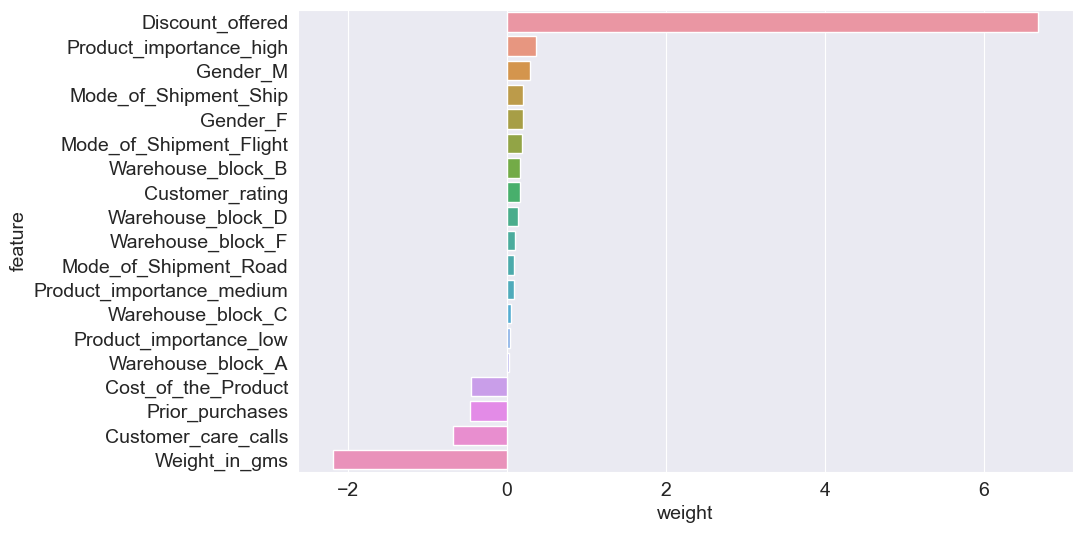

<IPython.core.display.Javascript object>

In [45]:
sns.barplot(
    data=feature_weight_df.sort_values("weight", ascending=False),
    x="weight",
    y="feature",
)

## Evaluating a model using a validation set and test set.

We can now use the trained model to make predictions on the training, test

In [46]:
train_preds = model.predict(X_train)

<IPython.core.display.Javascript object>

We can output a probabilistic prediction using predict_proba.

In [47]:
model.predict_proba(X_train)

array([[0.61192837, 0.38807163],
       [0.39555791, 0.60444209],
       [0.02756268, 0.97243732],
       ...,
       [0.42245064, 0.57754936],
       [0.52401883, 0.47598117],
       [0.57748868, 0.42251132]])

<IPython.core.display.Javascript object>

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [48]:
model.classes_

array([0, 1])

<IPython.core.display.Javascript object>

We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

This can be done using the accuracy_score function from sklearn.metrics.

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<IPython.core.display.Javascript object>

The model achieves an accuracy of 68.3% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [50]:
def predict_and_plot(inputs, targets, name=""):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize="true")
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title("{} Confusion Matrix".format(name))

    return preds

<IPython.core.display.Javascript object>

Let's compute the model's accuracy on the training set.

Accuracy: 68.32%


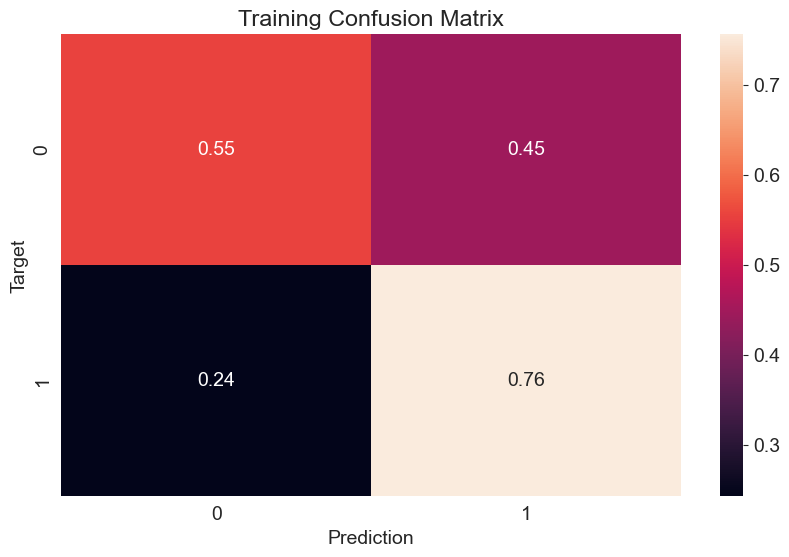

<IPython.core.display.Javascript object>

In [51]:
train_preds = predict_and_plot(X_train, train_targets, "Training")

Accuracy: 66.31%


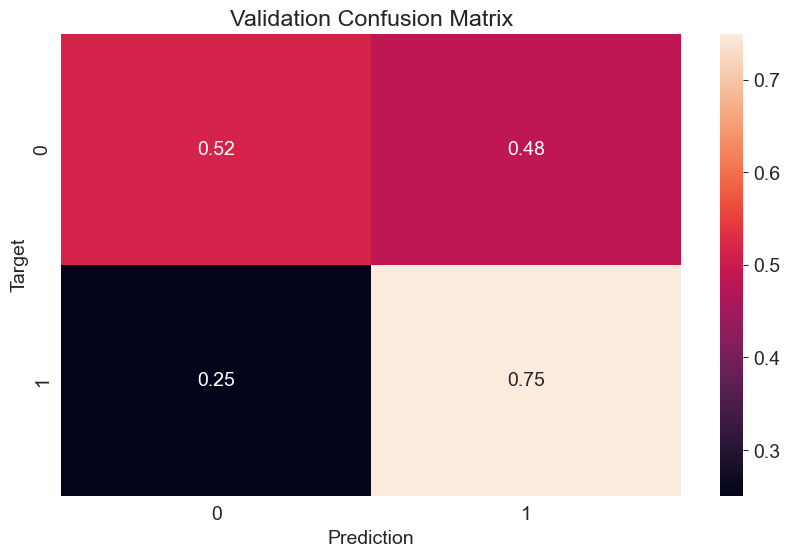

<IPython.core.display.Javascript object>

In [52]:
val_preds = predict_and_plot(X_val, val_targets, "Validation")

The accuracy of the model on the test and validation set are above 68%, which suggests that our model generalizes well to data it hasn't seen before.

But how good is 68% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [53]:
def random_guess(inputs):
    return np.random.choice([1, 0], len(inputs))

<IPython.core.display.Javascript object>

In [54]:
def all_yes(inputs):
    return np.full(len(inputs), 1)

<IPython.core.display.Javascript object>

Let's check the accuracies of these two models on the test set.

In [55]:
accuracy_score(val_targets, random_guess(X_val))

0.47955555555555557

<IPython.core.display.Javascript object>

In [56]:
accuracy_score(val_targets, all_yes(X_val))

0.6315555555555555

<IPython.core.display.Javascript object>

## Getting and saving predictions

Les's predict values for the test set and put then to a csv file.

In [57]:
test_preds = model.predict(X_test)
len(test_preds)

2000

<IPython.core.display.Javascript object>

In [58]:
pd.DataFrame({"pred": test_preds}).to_csv(
    "../jorgeav527-logistic-regression.csv", index=False
)

<IPython.core.display.Javascript object>

## Conclusions about the model applied.